In [44]:
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi

In [45]:
api = KaggleApi()
api.authenticate()

In [46]:
!kaggle datasets list -s 'parking'

ref                                                            title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
new-york-city/nyc-parking-tickets                              NYC Parking Tickets                                  2GB  2020-05-10 21:42:31          18351        238  0.8235294        
cityofLA/los-angeles-parking-citations                         Los Angeles Parking Citations                      394MB  2021-07-16 01:21:22           7618        227  0.7058824        
mfaisalqureshi/parking                                         US Parking Data                                     41KB  2021-06-17 05:22:51            369         31  0.9411765        
arcgisopendata/dc-parking-violations                           Parking

In [47]:
api.dataset_download_files("mypapit/klccparking")

In [48]:
import zipfile

In [49]:
with zipfile.ZipFile('klccparking.zip', 'r') as zipref:
    zipref.extractall()

In [28]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [50]:
df1 = pd.read_csv('parking-klcc-2016-2017.txt')
df1.head()

,KLCC;1642;2016-06-01 10:12:37
0,KLCC;1609;2016-06-01 10:15:05
1,KLCC;1458;2016-06-01 10:30:05
2,KLCC;1357;2016-06-01 10:45:04
3,KLCC;1235;2016-06-01 11:00:06
4,KLCC;1076;2016-06-01 11:15:04


In [51]:
import csv

In [52]:
text = open("parking-klcc-2016-2017.txt", "r")
text = ''.join([i for i in text]) \
    .replace("OPEN", "NaN")
x = open("output1.txt","w")
x.writelines(text)
x.close()

In [53]:
text = open("output1.txt", "r")
text = ''.join([i for i in text]) \
    .replace("FULL", "5500")
x = open("output2.txt","w")
x.writelines(text)
x.close()

In [54]:
with open('output2.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split(";") for line in stripped if line)
    with open('parking-klcc-2016-2017.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(('id', 'spaces', 'updatedon'))
        writer.writerows(lines)

In [55]:
#reading the parking_details dataset file
df = pd.read_csv('parking-klcc-2016-2017.csv')
df.head()

,id,spaces,updatedon
0,KLCC,1642.0,2016-06-01 10:12:37
1,KLCC,1609.0,2016-06-01 10:15:05
2,KLCC,1458.0,2016-06-01 10:30:05
3,KLCC,1357.0,2016-06-01 10:45:04
4,KLCC,1235.0,2016-06-01 11:00:06


In [96]:
df.isnull().sum()

spaces    0
dtype: int64

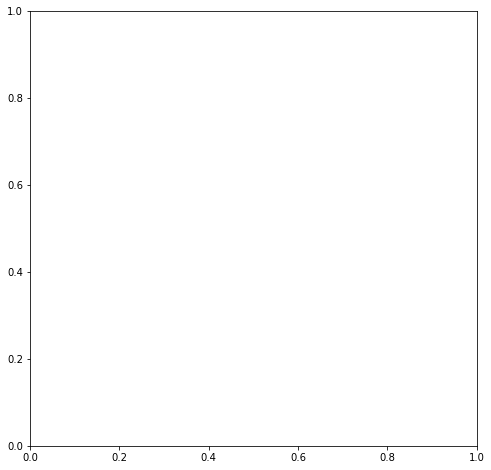

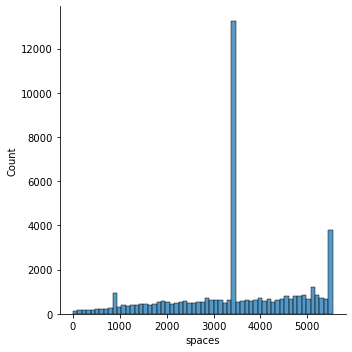

In [99]:
fig, ax = plt.subplots(figsize=(8,8))
sns.displot(df.spaces)

In [65]:
df['spaces'].fillna(df['spaces'].mean(),inplace=True)

In [66]:
df.isnull().any()

id           False
spaces       False
updatedon    False
dtype: bool

In [67]:
df

,id,spaces,updatedon
0,KLCC,1642.000000,2016-06-01 10:12:37
1,KLCC,1609.000000,2016-06-01 10:15:05
2,KLCC,1458.000000,2016-06-01 10:30:05
3,KLCC,1357.000000,2016-06-01 10:45:04
4,KLCC,1235.000000,2016-06-01 11:00:06
...,...,...,...
47600,KLCC,3472.484771,2017-11-15 07:30:02
47601,KLCC,3472.484771,2017-11-15 07:45:03
47602,KLCC,3472.484771,2017-11-15 08:00:03
47603,KLCC,3472.484771,2017-11-15 08:15:02


In [68]:
#converting the updatedon column to pandas datetime format 
df['updatedon'] = pd.to_datetime(df['updatedon'])
date_time = pd.to_datetime(df.pop('updatedon'), format='%d.%m.%Y %H:%M:%S')
id = df.pop('id')
df.head()

,spaces
0,1642.0
1,1609.0
2,1458.0
3,1357.0
4,1235.0


In [42]:
df.shape

(47605, 1)

In [69]:
df

,spaces
0,1642.000000
1,1609.000000
2,1458.000000
3,1357.000000
4,1235.000000
...,...
47600,3472.484771
47601,3472.484771
47602,3472.484771
47603,3472.484771


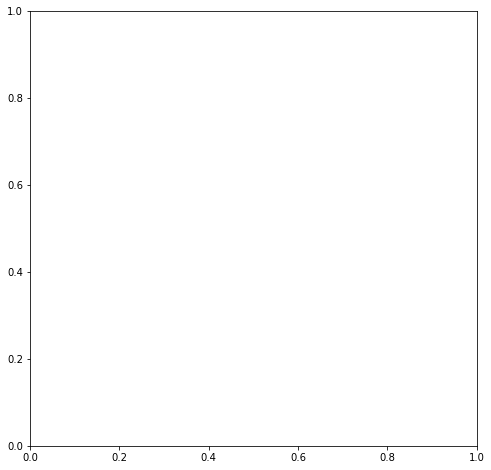

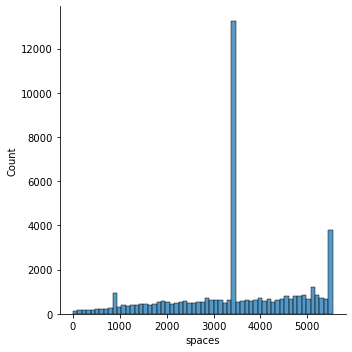

In [95]:
fig, ax = plt.subplots(figsize=(8,8))
sns.displot(df.spaces)

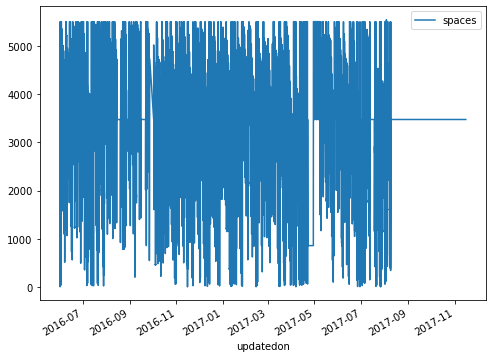

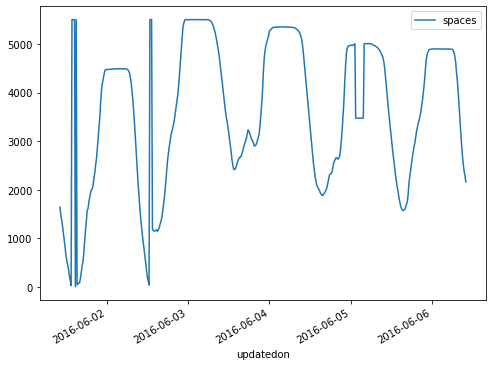

In [71]:
plot_cols = ['spaces']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [72]:
df.describe()

,spaces
count,47605.000000
mean,3472.484771
std,1328.824980
min,3.000000
25%,2793.000000
50%,3472.484771
75%,4500.000000
max,5539.000000


In [73]:
column_indices = {name: i for i, name in enumerate(df.columns)}
n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [74]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [100]:
#Indexes and offsets
#creating a class for windows generator

class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
               train_df = train_df, val_df = val_df, test_df = test_df,
               label_columns=None):
        
        #store the raw data
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df
        
        #Work out the label column indices
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}
        
        #work out the windows parameters
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift
        
        self.total_window_size = input_width + shift
        
        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]
        
        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]
        

    def __repr__(self):
        return '\n' .join([
            f'Total window size: {self.total_window_size}',
            f'Input Indices: {self.input_indices}',
            f'Label Indices: {self.label_indices}',
            f'Label Column name(s): {self.label_columns}'])

In [101]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                    label_columns=['spaces'])

w1

Total window size: 48
Input Indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label Indices: [47]
Label Column name(s): ['spaces']

In [102]:
def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
        labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)
        
    #slicing doesnt preserve static shape information, so set the shapes
    #manually. This way the tf.data.Datasets are easier to inspect
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])
    
    return inputs, labels


WindowGenerator.split_window = split_window

In [103]:
#stack three slices, the length of the total window
example_window = tf.stack([np.array(train_df[:w1.total_window_size]),
                          np.array(train_df[100:100+w1.total_window_size]),
                          np.array(train_df[200:200+w1.total_window_size])])

example_inputs, example_labels = w1.split_window(example_window)

print('All Shapes are: (batch, time, features)')
print(f'Window Shape: {example_window.shape}')
print(f'Inputs Shape: {example_inputs.shape}')
print(f'Labels Shape: {example_labels.shape}')

All Shapes are: (batch, time, features)
Window Shape: (3, 48, 1)
Inputs Shape: (3, 24, 1)
Labels Shape: (3, 1, 1)


In [104]:
w1.example = example_inputs, example_labels

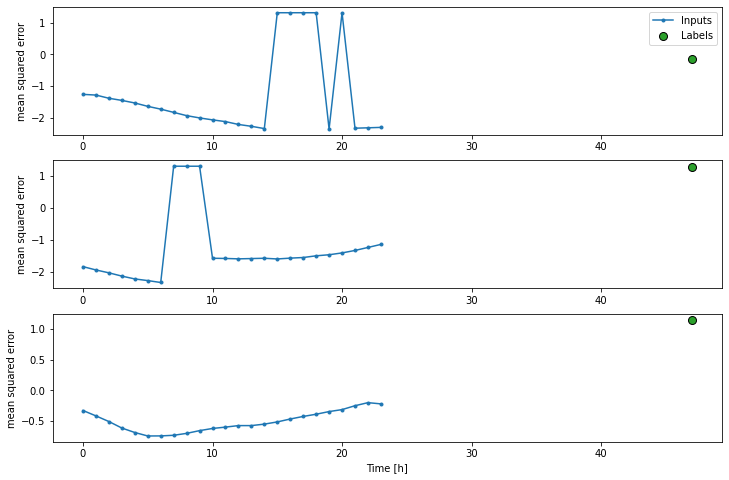

In [105]:
#plot
def plot(self, model=None, plot_col = ('spaces'), max_subplots=3, plot_feature = df[plot_cols]):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
        plt.subplot(max_n, 1, n+1)
        plt.ylabel('mean squared error')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                label='Inputs', marker='.', zorder=-10)
        
        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index
            
        if label_col_index is None:
            continue
            
        
        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                   edgecolors='k', label='Labels', c='#2ca02c', s=64)
        
        if model is not None:
            predictions = model(inputs)
            plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                       marker='X', edgecolors='k', label='Predictions',
                       c='#ff7f0e', s=64)
            
        if n == 0:
            plt.legend()
            
            
    plt.xlabel('Time [h]')
    
    
WindowGenerator.plot = plot

w1.plot()

In [106]:
def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32,)
    ds = ds.map(self.split_window)
    
    
    return ds
    

WindowGenerator.make_dataset = make_dataset

In [107]:
@property
def train(self):
    return self.make_dataset(self.train_df)

@property
def val(self):
    return self.make_dataset(self.val_df)

@property
def test(self):
    return self.make_dataset(self.test_df)

@property
def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
        #No example of batch was found, so get one from the '.train' dataset
        result = next(iter(self.train))
        #and cache it for next time
        self._example = result
    return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [108]:
#each element is an input (inputs, label) pair
w1.train.element_spec

(TensorSpec(shape=(None, 24, 1), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [109]:
#Iterating over a Dataset yields concrete batches
for example_inputs, example_labels in w1.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 1)
Labels shape (batch, time, features): (32, 1, 1)


In [110]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['spaces'])
single_step_window

Total window size: 2
Input Indices: [0]
Label Indices: [1]
Label Column name(s): ['spaces']

In [111]:
for example_inputs, example_labels in single_step_window.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 1)
Labels shape (batch, time, features): (32, 1, 1)


In [112]:
#Baseline model
class Baseline(tf.keras.Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index
    
    def call(self, inputs):
        if self.label_index is None:
            return inputs
        result = inputs[:, :, self.label_index]
        return result[:, :, tf.newaxis]

In [113]:
#instantiate and evaluate model
baseline = Baseline(label_index=column_indices['spaces'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

298/298 [==============================] - 0s 737us/step - loss: 0.0786 - mean_absolute_error: 0.0586


In [114]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['spaces'])

wide_window

Total window size: 25
Input Indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label Indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label Column name(s): ['spaces']

In [115]:
MAX_EPOCHS = 100

def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                      patience=patience,
                                                      mode='min')
    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                        validation_data=window.val,
                        callbacks=[early_stopping])
    return history

In [116]:
#recurrent model
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [117]:
history = compile_and_fit(lstm_model, wide_window)

val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

Epoch 1/100
1041/1041 [==============================] - 9s 7ms/step - loss: 0.1154 - mean_absolute_error: 0.1616 - val_loss: 0.0724 - val_mean_absolute_error: 0.0719
Epoch 2/100
1041/1041 [==============================] - 7s 7ms/step - loss: 0.0661 - mean_absolute_error: 0.0952 - val_loss: 0.0704 - val_mean_absolute_error: 0.0705
Epoch 3/100
1041/1041 [==============================] - 7s 7ms/step - loss: 0.0646 - mean_absolute_error: 0.0919 - val_loss: 0.0698 - val_mean_absolute_error: 0.0705
Epoch 4/100
1041/1041 [==============================] - 7s 7ms/step - loss: 0.0641 - mean_absolute_error: 0.0914 - val_loss: 0.0695 - val_mean_absolute_error: 0.0783
Epoch 5/100
1041/1041 [==============================] - 7s 7ms/step - loss: 0.0636 - mean_absolute_error: 0.0909 - val_loss: 0.0689 - val_mean_absolute_error: 0.0732
Epoch 6/100
1041/1041 [==============================] - 7s 7ms/step - loss: 0.0630 - mean_absolute_error: 0.0904 - val_loss: 0.0688 - val_mean_absolute_error: 0.071

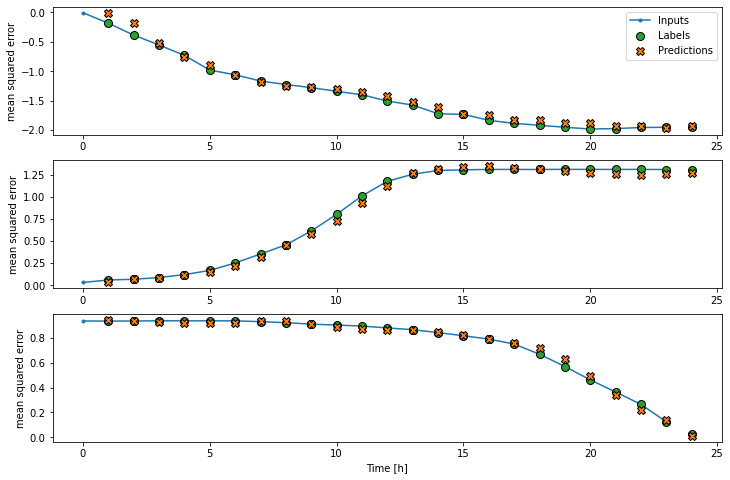

In [118]:
wide_window.plot(lstm_model)